In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Let's Clean Some Data

Fivethirtyeight has some great data sets and this is one of them. In July 2014, before the third Star Wars trilogy was released, they decided to survey Americans to see which of the first six movies was their favorite. Let's take a look at the results. Some light cleaning should make it more usable!

In [2]:
# import libraries and csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [3]:
# explore the data frame
display(star_wars.head(10))
display(star_wars.columns)
display(star_wars.shape)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

(1186, 38)

In [4]:
# rename columns
new_columns = {"Have you seen any of the 6 films in the Star Wars franchise?":"Seen any of the first 6 Star Wars movies?",
               "Do you consider yourself to be a fan of the Star Wars film franchise?":"Fan of the Star Wars franchise?",
               "Which of the following Star Wars films have you seen? Please select all that apply." : "seen_ep_1",
               "Unnamed: 4" : "seen_ep_2",
               "Unnamed: 5" : "seen_ep_3",
               "Unnamed: 6" : "seen_ep_4",
               "Unnamed: 7" : "seen_ep_5",
               "Unnamed: 8" : "seen_ep_6",
               "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"rank_ep_1",
               "Unnamed: 10":"rank_ep_2",
               "Unnamed: 11":"rank_ep_3",
               "Unnamed: 12":"rank_ep_4",
               "Unnamed: 13":"rank_ep_5",
               "Unnamed: 14":"rank_ep_6"}

star_wars = star_wars.rename(columns = new_columns)

In [5]:
# value counts for columns 1:3
print(star_wars["Seen any of the first 6 Star Wars movies?"].value_counts(dropna=False))
print(star_wars["Fan of the Star Wars franchise?"].value_counts(dropna=False))
print(star_wars["seen_ep_1"].value_counts(dropna=False))

Yes    936
No     250
Name: Seen any of the first 6 Star Wars movies?, dtype: int64
Yes    552
NaN    350
No     284
Name: Fan of the Star Wars franchise?, dtype: int64
Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: seen_ep_1, dtype: int64


In [6]:
# switch values to boolean for columns 1:2
yes_no_bool = {"Yes":True, "No":False}
star_wars["Seen any of the first 6 Star Wars movies?"] = star_wars["Seen any of the first 6 Star Wars movies?"].map(yes_no_bool)
star_wars["Fan of the Star Wars franchise?"] = star_wars["Fan of the Star Wars franchise?"].map(yes_no_bool)


# switch values to boolean for columns 3:9
watch_bool = {"Star Wars: Episode I  The Phantom Menace" : True,
              "Star Wars: Episode II  Attack of the Clones" : True,
              "Star Wars: Episode III  Revenge of the Sith" : True,
              "Star Wars: Episode IV  A New Hope" : True,
              "Star Wars: Episode V The Empire Strikes Back" : True,
              "Star Wars: Episode VI Return of the Jedi" : True,
              np.NaN : False}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(watch_bool)

# value counts for columns 1:3
print(star_wars["Seen any of the first 6 Star Wars movies?"].value_counts(dropna=False))
print(star_wars["Fan of the Star Wars franchise?"].value_counts(dropna=False))
display(star_wars.iloc[:,3].value_counts(dropna=False))

True     936
False    250
Name: Seen any of the first 6 Star Wars movies?, dtype: int64
True     552
NaN      350
False    284
Name: Fan of the Star Wars franchise?, dtype: int64


True     673
False    513
Name: seen_ep_1, dtype: int64

In [7]:
star_wars.iloc[:,9:15].head()

,rank_ep_1,rank_ep_2,rank_ep_3,rank_ep_4,rank_ep_5,rank_ep_6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0


In [8]:
# convert rankings to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# convert rankings order, i.e. 1:6 and 6:1 etc
# this makes bar chart easier to look at and allows for pie charts
star_wars.iloc[:,9:15] = star_wars.iloc[:,9:15].replace({1:6, 6:1, 2:5, 5:2, 3:4, 4:3})

In [9]:
star_wars.iloc[:,9:15].head()

,rank_ep_1,rank_ep_2,rank_ep_3,rank_ep_4,rank_ep_5,rank_ep_6
0,4.0,5.0,6.0,3.0,2.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,6.0,5.0,4.0,3.0,2.0,1.0
3,2.0,1.0,6.0,5.0,3.0,4.0
4,2.0,3.0,1.0,5.0,6.0,4.0


# Closer Look
Now that the columns are renamed and the values have been changed to True/False we can start analyzing the data.

In [10]:
# get average value for seen any, fan, which episode, rankings by episode
group_means = star_wars.iloc[:,1:15].mean()
display(group_means)

# totals
group_sums = star_wars.iloc[:,1:9].sum()
display(group_sums)

gender_means = star_wars.groupby("Gender").mean()
display(gender_means)

gender_sums = star_wars.groupby("Gender").sum()
gender_sums = gender_sums.iloc[:,0:8]
gender_sums

Seen any of the first 6 Star Wars movies?    0.789207
Fan of the Star Wars franchise?              0.660287
seen_ep_1                                    0.567454
seen_ep_2                                    0.481450
seen_ep_3                                    0.463744
seen_ep_4                                    0.511804
seen_ep_5                                    0.639123
seen_ep_6                                    0.622260
rank_ep_1                                    3.267066
rank_ep_2                                    2.912679
rank_ep_3                                    2.658683
rank_ep_4                                    3.727273
rank_ep_5                                    4.486842
rank_ep_6                                    3.952153
dtype: float64

Seen any of the first 6 Star Wars movies?    936
Fan of the Star Wars franchise?              552
seen_ep_1                                    673
seen_ep_2                                    571
seen_ep_3                                    550
seen_ep_4                                    607
seen_ep_5                                    758
seen_ep_6                                    738
dtype: object

,RespondentID,Seen any of the first 6 Star Wars movies?,seen_ep_1,seen_ep_2,seen_ep_3,seen_ep_4,seen_ep_5,seen_ep_6,rank_ep_1,rank_ep_2,rank_ep_3,rank_ep_4,rank_ep_5,rank_ep_6
Gender,,,,,,,,,,,,,,
Female,3.289817e+09,0.723133,0.542805,0.431694,0.404372,0.464481,0.642987,0.615665,3.570707,3.045340,2.581864,3.455919,4.430730,3.921914
Male,3.290478e+09,0.851107,0.726358,0.649899,0.637827,0.688129,0.788732,0.778672,2.962175,2.775414,2.725118,4.002364,4.541371,3.997636


,RespondentID,Seen any of the first 6 Star Wars movies?,seen_ep_1,seen_ep_2,seen_ep_3,seen_ep_4,seen_ep_5,seen_ep_6
Gender,,,,,,,,
Female,1806109676556,397,298,237,222,255,353,338
Male,1635367528067,423,361,323,317,342,392,387


In [11]:
# math check :)
display(star_wars["Seen any of the first 6 Star Wars movies?"].value_counts(dropna=False))

display(star_wars["Fan of the Star Wars franchise?"].value_counts(dropna=False))
display(552/(552+284))

# group values for seen_ep_5 & rank_ep_5
print("group seen 5:", star_wars["seen_ep_5"].sum())
print("group rank 5 sum:", star_wars["rank_ep_5"].sum())
print("group rank 5 length:", len(star_wars["rank_ep_5"].dropna()))
print("group rank 6 length:", len(star_wars["rank_ep_6"].dropna()))
print("group rank 5:", 3751/836)

# females
print()
females = star_wars[star_wars["Gender"] == "Female"]
print("females seen 5:", females["seen_ep_5"].sum())
print("females rank 5 sum:", females["rank_ep_5"].sum())
print("females rank 5 length:", len(females["rank_ep_5"].dropna()))
print("females rank 6 length:", len(females["rank_ep_6"].dropna()))
print("females rank 5:", 1759/397)

# males
print()
males = star_wars[star_wars["Gender"] == "Male"]
print("males seen 5:", males["seen_ep_5"].sum())
print("males rank 5 sum:", males["rank_ep_5"].sum())
print("males rank 5 length:", len(males["rank_ep_5"].dropna()))
print("males rank 6 length:", len(males["rank_ep_6"].dropna()))
print("males rank 5:", 1921/423)

True     936
False    250
Name: Seen any of the first 6 Star Wars movies?, dtype: int64

True     552
NaN      350
False    284
Name: Fan of the Star Wars franchise?, dtype: int64

0.6602870813397129

group seen 5: 758
group rank 5 sum: 3751.0
group rank 5 length: 836
group rank 6 length: 836
group rank 5: 4.4868421052631575

females seen 5: 353
females rank 5 sum: 1759.0
females rank 5 length: 397
females rank 6 length: 397
females rank 5: 4.430730478589421

males seen 5: 392
males rank 5 sum: 1921.0
males rank 5 length: 423
males rank 6 length: 423
males rank 5: 4.541371158392435


In [12]:
# fan_nan
fan_nan = star_wars[(star_wars.iloc[:,1] == True) & (star_wars.iloc[:,2].isna())]
display(fan_nan.head())
display(fan_nan.shape)

,RespondentID,Seen any of the first 6 Star Wars movies?,Fan of the Star Wars franchise?,seen_ep_1,seen_ep_2,seen_ep_3,seen_ep_4,seen_ep_5,seen_ep_6,rank_ep_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
10,3292637870,True,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,3291669388,True,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,3291570206,True,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,3291469991,True,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,3291420030,True,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(100, 38)

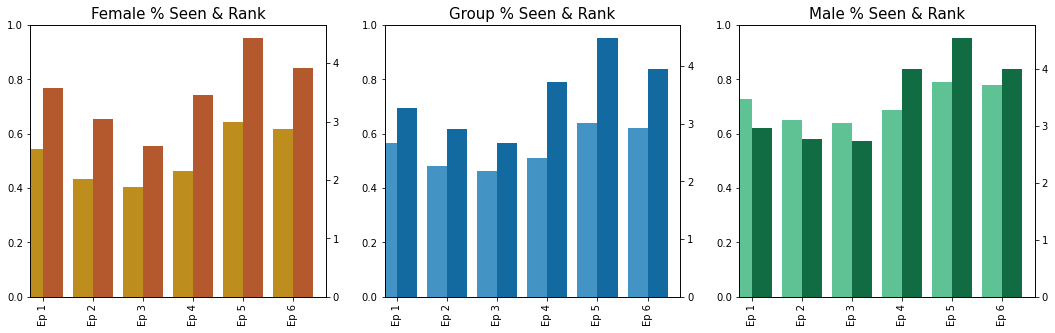

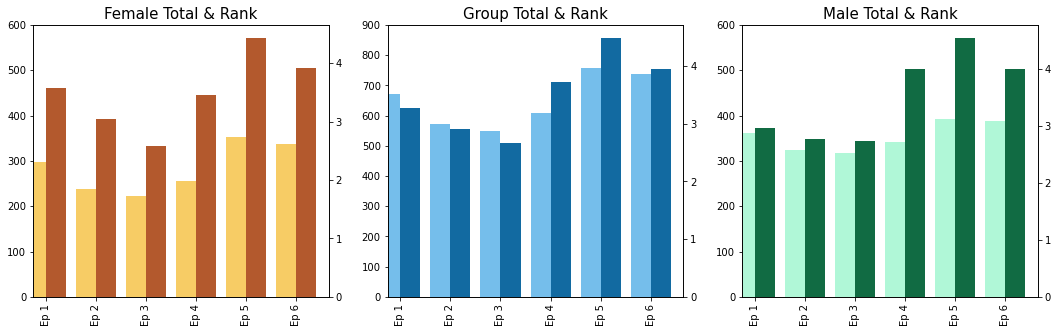

In [13]:
# female, group, and male % seen and total seen compared to rank (1 is good!)
ep_index = ["Ep 1","Ep 2","Ep 3","Ep 4","Ep 5","Ep 6"]

# % seen and rank
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(131) # female % seen and average rank
ax2 = ax.twinx() 
width = 0.4
gender_means.iloc[0,2:8].plot(kind="bar", color="#BD8D1E", ax=ax, width=width, position=1)
gender_means.iloc[0,8:14].plot(kind="bar", color="#B3592D", ax=ax2, width=width, position=0)
ax.set_ylim(top=1.0)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(ep_index)
plt.title("Female % Seen & Rank", size=15)
ax = fig.add_subplot(132) # group % seen and average rank
ax2 = ax.twinx() 
width = 0.4
ax.set_ylim(top=1.0)
group_means.iloc[2:8].plot(kind="bar", color="#4393C4", ax=ax, width=width, position=1)
group_means.iloc[8:14].plot(kind="bar", color="#126AA1", ax=ax2, width=width, position=0)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(ep_index)
plt.title("Group % Seen & Rank", size=15)
ax = fig.add_subplot(133)#  male % seen and average rank
ax2 = ax.twinx() 
width = 0.4
gender_means.iloc[1,2:8].plot(kind="bar", color="#5FC295", ax=ax, width=width, position=1)
gender_means.iloc[1,8:14].plot(kind="bar", color="#116B43", ax=ax2, width=width, position=0)
ax.set_ylim(top=1.0)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(ep_index)
plt.title("Male % Seen & Rank", size=15)
plt.show()

# sums and rank
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(131) # female total seen and average rank
ax2 = ax.twinx() 
width = 0.4
gender_sums.iloc[0,2:8].plot(kind="bar", color="#F7CC65", ax=ax, width=width, position=1)
gender_means.iloc[0,8:14].plot(kind="bar", color="#B3592D", ax=ax2, width=width, position=0)
ax.set_ylim(top=600)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(ep_index)
plt.title("Female Total & Rank", size=15)
ax = fig.add_subplot(132) # group total seen and average rank
ax2 = ax.twinx() 
width = 0.4
group_sums.iloc[2:8].plot(kind="bar", color="#75BEEB", ax=ax, width=width, position=1)
group_means.iloc[8:14].plot(kind="bar", color="#126AA1", ax=ax2, width=width, position=0)
ax.set_ylim(top=900)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(ep_index)
plt.title("Group Total & Rank", size=15)
ax = fig.add_subplot(133) # male total seen and average rank
ax2 = ax.twinx() 
width = 0.4
gender_sums.iloc[1,2:8].plot(kind="bar", color="#B0F7D7", ax=ax, width=width, position=1)
gender_means.iloc[1,8:14].plot(kind="bar", color="#116B43", ax=ax2, width=width, position=0)
ax.set_ylim(top=600)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(ep_index)
plt.title("Male Total & Rank", size=15)
plt.show()

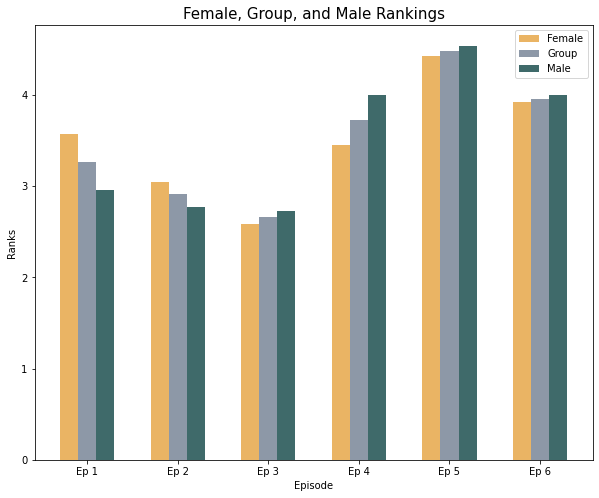

In [14]:
# female, group, and male rank
ep_index = ["Ep 1","Ep 2","Ep 3","Ep 4","Ep 5","Ep 6"]
fig = plt.figure(figsize=(10,8))
x = np.arange(6)
y1 = gender_means.iloc[0,8:14]
y2 = group_means.iloc[8:14]
y3 = gender_means.iloc[1,8:14]
width = 0.2
plt.bar(x-0.2, y1, width, color="#EAB464")
plt.bar(x, y2, width, color="#8D98A7")
plt.bar(x+0.2, y3, width, color="#3F6A6A")
plt.xticks(x, ep_index)
plt.xlabel("Episode")
plt.ylabel("Ranks")
plt.legend(["Female", "Group", "Male"])
plt.title("Female, Group, and Male Rankings", size=15)
plt.show()

# Impressions
* The original dataset contains 1186 rows of unique respondents. 78% of them have seen a Star Wars movie and 66% consider themselves fans of the franchise. That's pretty good!

* There are 100 respondents who have seen some of the movies but their answer to if they were a fan is set to `NaN`. This sets all the other values in the row to `NaN` as well. There's no indication as to why they are blank.

* The bar charts show a pretty even distribution of which movies the male respondents have seen, but for females there is some variation in viewers. The most seen are Episodes V, VI, and I respectively. Episode IV, the one that started it all, has almost as many viewers as I.

* The favorite is Episode V, with VI and IV coming in close second and third ranks. Episodes II and III are not popular... Females like Episode I more than males, and males like Episode IV more than females.

* Using the total number seen or percentage of the total seen doesn't look much different on the graph. The rest of the analysis will use percentages.

# Other Groups
There are other demographic groups available. Next we'll compare Star Trek fans, age, income, education and geographic region.

### Star Trek Fans

In [15]:
# trekkies
trekkies = star_wars.groupby(star_wars.iloc[:,32]).mean()
trekkies

,RespondentID,Seen any of the first 6 Star Wars movies?,seen_ep_1,seen_ep_2,seen_ep_3,seen_ep_4,seen_ep_5,seen_ep_6,rank_ep_1,rank_ep_2,rank_ep_3,rank_ep_4,rank_ep_5,rank_ep_6
Do you consider yourself to be a fan of the Star Trek franchise?,,,,,,,,,,,,,,
No,3.290120e+09,0.644306,0.469579,0.355694,0.344774,0.402496,0.550702,0.521061,3.512136,3.084746,2.721550,3.566586,4.365617,3.755448
Yes,3.290126e+09,0.971897,0.852459,0.786885,0.754098,0.800937,0.929742,0.927400,3.031325,2.744578,2.596618,3.889157,4.592771,4.149398


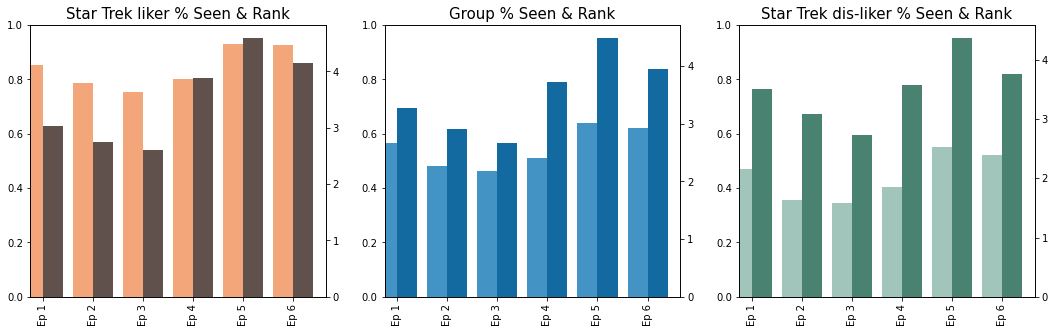

In [16]:
# % seen and rank
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(131)#  Star Trek liker % seen and average rank
ax2 = ax.twinx() 
width = 0.4
trekkies.iloc[1,2:8].plot(kind="bar", color="#F2A679", ax=ax, width=width, position=1)
trekkies.iloc[1,8:14].plot(kind="bar", color="#61514C", ax=ax2, width=width, position=0)
ax.set_ylim(top=1.0)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(ep_index)
plt.title("Star Trek liker % Seen & Rank", size=15)
ax = fig.add_subplot(132) # group % seen and average rank
ax2 = ax.twinx() 
width = 0.4
group_means.iloc[2:8].plot(kind="bar", color="#4393C4", ax=ax, width=width, position=1)
group_means.iloc[8:14].plot(kind="bar", color="#126AA1", ax=ax2, width=width, position=0)
ax.set_ylim(top=1.0)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(ep_index)
plt.title("Group % Seen & Rank", size=15)
ax = fig.add_subplot(133) # Star Trek dis-liker % seen and average rank
ax2 = ax.twinx() 
width = 0.4
trekkies.iloc[0,2:8].plot(kind="bar", color="#A1C4BB", ax=ax, width=width, position=1)
trekkies.iloc[0,8:14].plot(kind="bar", color="#498271", ax=ax2, width=width, position=0)
ax.set_ylim(top=1.0)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(ep_index)
plt.title("Star Trek dis-liker % Seen & Rank", size=15)
plt.show()

### Star Trek Fan Impressions
* People that like Star Trek are not fans of the first three movies.
* People who dislike Star Trek like Episode I about as much as they like Episodes IV and VI.

### Age Groups

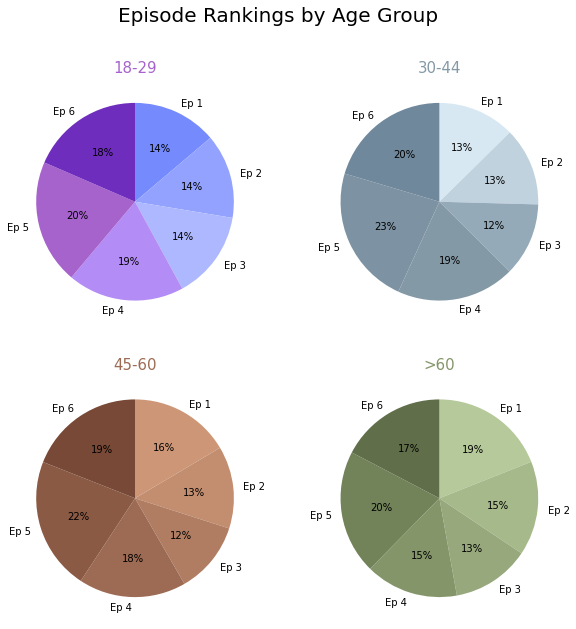

In [19]:
# age groups
ages = star_wars.groupby("Age").mean()

# pie charts for age-group rankings
labels = ep_index
colors1 = ["#758bfd", "#92a2fe", "#aeb8fe", "#b38cf5", "#a663cc", "#6f2dbd"]
colors2 = ["#d8e8f3", "#c0d2de", "#94aab9", "#8499a6", "#7d93a3", "#70889c"]
colors3 = ["#cd9777", "#c38e70", "#b07d62", "#9d6b53", "#8a5a44", "#774936"]
colors4 = ["#b5c99a", "#a6b98b", "#97a97c", "#849669", "#728359", "#606f49"]
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,10))
# 18-29
labels = ep_index
values = ages.iloc[0,8:14]
ax1.pie(values, labels = labels, colors = colors1, autopct = '%1.0f%%', startangle=90, counterclock=False)
# for i, value in enumerate(values):
#   labels[i].set_color(value.get_facecolor())### Star Trek Fan Impressions
# ax1.set_label(color="#a663cc")
ax1.set_title("18-29", size=15, color="#a663cc")
# 30-44
labels = ep_index
values = ages.iloc[1,8:14]
ax2.pie(values, labels = labels, colors = colors2, autopct = '%1.0f%%', startangle=90, counterclock=False)
ax2.set_title("30-44", size=15, color="#8499a6")
# 45-60
labels = ep_index
values = ages.iloc[2,8:14]
ax3.pie(values, labels = labels, colors = colors3, autopct = '%1.0f%%', startangle=90, counterclock=False)
ax3.set_title("45-60", size=15, color="#9d6b53")
# >60
labels = ep_index
values = ages.iloc[3,8:14]
ax4.pie(values, labels = labels, colors = colors4, autopct = '%1.0f%%', startangle=90, counterclock=False)
ax4.set_title(">60", size=15, color="#849669")
fig.suptitle("Episode Rankings by Age Group", size=20)
plt.show()


### Age Group Impressions
* All age groups prefer Episode 5
* 30-44 and 45-60 year olds have the strongest preference for the last three movies in the series.
* People over 60 like all the movies about the same, except for Episode III, which is understandable.
* People who are 18-29 years old do not like the first three movies in the series. Discerning taste, young padawans.

### Household Income Groups

In [34]:
# incomes
incomes = star_wars.groupby("Household Income").mean()
new_index = ["$0 - $24,999", "$25,000 - $49,999", "$50,000 - $99,999", "$100,000 - $149,999", "$150,000+"]
incomes = incomes.reindex(new_index)
incomes = incomes.rename_axis("Household Income")
incomes

,RespondentID,Seen any of the first 6 Star Wars movies?,seen_ep_1,seen_ep_2,seen_ep_3,seen_ep_4,seen_ep_5,seen_ep_6,rank_ep_1,rank_ep_2,rank_ep_3,rank_ep_4,rank_ep_5,rank_ep_6
Household Income,,,,,,,,,,,,,,
"$0 - $24,999",3.290153e+09,0.710145,0.543478,0.478261,0.463768,0.528986,0.659420,0.623188,3.183673,3.040816,2.897959,3.826531,4.255102,3.795918
"$25,000 - $49,999",3.290133e+09,0.790323,0.612903,0.505376,0.489247,0.521505,0.693548,0.666667,3.530612,3.129252,2.748299,3.353741,4.517007,3.721088
"$50,000 - $99,999",3.290102e+09,0.798658,0.664430,0.557047,0.526846,0.583893,0.724832,0.687919,3.172996,2.823529,2.659664,3.911765,4.554622,3.886555
"$100,000 - $149,999",3.290235e+09,0.815603,0.617021,0.531915,0.517730,0.588652,0.758865,0.751773,3.243478,2.826087,2.596491,3.600000,4.600000,4.147826
"$150,000+",3.290021e+09,0.810526,0.715789,0.568421,0.568421,0.642105,0.747368,0.747368,3.259740,2.623377,2.428571,4.038961,4.675325,3.974026


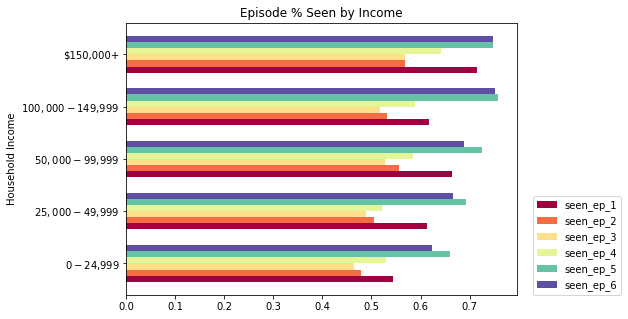

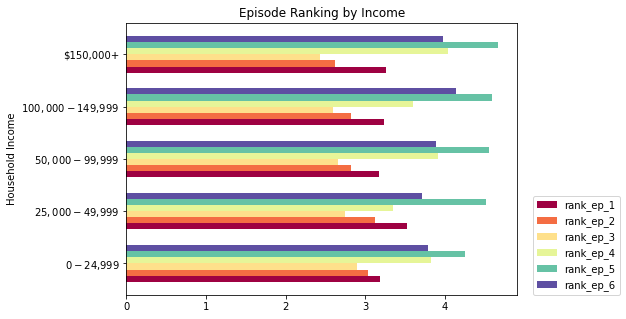

In [18]:
# income % seen bar chart
from matplotlib.pyplot import cm
my_cmap = cm.get_cmap("Spectral")
columns1 = incomes.iloc[:,2:8]
columns1.plot(kind="barh", figsize=(7,5), width=0.7, colormap=my_cmap)
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
plt.title("Episode % Seen by Income")
plt.show()

# income rank bar chart
my_cmap = cm.get_cmap("Spectral")
columns2 = incomes.iloc[:,8:14]
columns2.plot(kind="barh", figsize=(7,5), width=0.7, colormap=my_cmap)
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
plt.title("Episode Ranking by Income")
plt.show()

### Household Income Impressions
* I really want to change the order on these charts...
* The breakdown by household income is very consistent among the groups, in viewership and ranking.
* Episodes IV, V, and VI are consistently ranked highest.
* There is some variation in the relative rankings of Episodes IV and VI.

### Education

In [29]:
education = star_wars.groupby("Education").mean()
education = education.reset_index()
education = education.reindex(index = [3,2,4,0,1]).set_index("Education")
education

,RespondentID,Seen any of the first 6 Star Wars movies?,seen_ep_1,seen_ep_2,seen_ep_3,seen_ep_4,seen_ep_5,seen_ep_6,rank_ep_1,rank_ep_2,rank_ep_3,rank_ep_4,rank_ep_5,rank_ep_6
Education,,,,,,,,,,,,,,
Less than high school degree,3.289831e+09,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,2.000000,1.666667,3.333333,4.333333,6.000000,3.666667
High school degree,3.290433e+09,0.676190,0.542857,0.457143,0.457143,0.504762,0.580952,0.571429,3.197183,3.253521,2.873239,3.788732,4.126761,3.760563
Some college or Associate degree,3.290179e+09,0.774390,0.643293,0.567073,0.557927,0.548780,0.692073,0.679878,3.448819,3.114173,2.897638,3.496063,4.216535,3.826772
Bachelor degree,3.290151e+09,0.816199,0.641745,0.529595,0.507788,0.607477,0.757009,0.728972,3.171756,2.709924,2.478927,3.885496,4.690840,4.068702
Graduate degree,3.289917e+09,0.821818,0.650909,0.541818,0.505455,0.592727,0.752727,0.730909,3.177778,2.774336,2.500000,3.800885,4.676991,4.079646


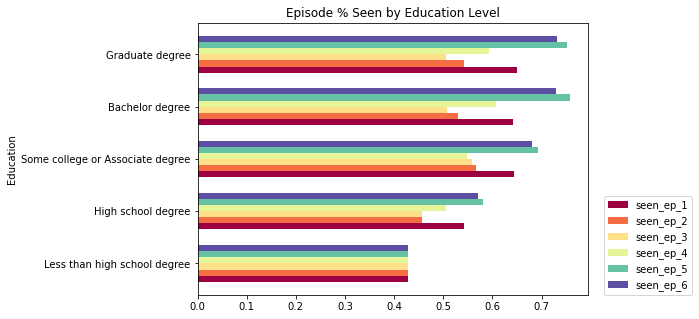

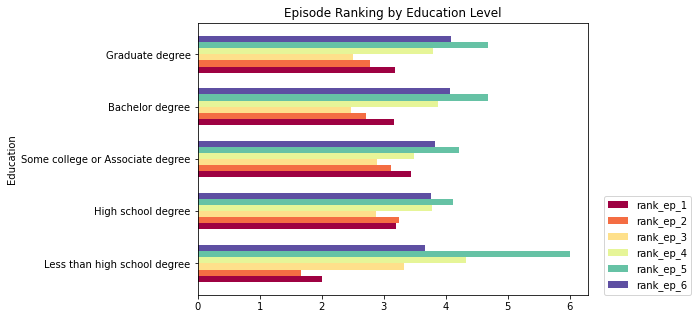

In [30]:
# income % seen bar chart
from matplotlib.pyplot import cm
my_cmap = cm.get_cmap("Spectral")
columns1 = education.iloc[:,2:8]
columns1.plot(kind="barh", figsize=(7,5), width=0.7, colormap=my_cmap)
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
plt.title("Episode % Seen by Education Level")
plt.show()

# income rank bar chart
my_cmap = cm.get_cmap("Spectral")
columns2 = education.iloc[:,8:14]
columns2.plot(kind="barh", figsize=(7,5), width=0.7, colormap=my_cmap)
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
plt.title("Episode Ranking by Education Level")
plt.show()

### Education Impressions
* Stuff
* Stuff

### Geographic Region
* Stuff
* Stuff

### Geographic Region Impressions
* Stuff
* Stuff

# Conclusions
* Stuff
* Stuff